In [0]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [2]:
!wget --no-check-certificate "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" -O "/tmp/cats-and-dogs.zip"

--2020-06-13 11:32:54--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.199.64.143, 2600:1417:7800:2b7::e59, 2600:1417:7800:298::e59, ...
Connecting to download.microsoft.com (download.microsoft.com)|23.199.64.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M  22.2MB/s    in 37s     

2020-06-13 11:33:31 (21.3 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [0]:
local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

12501
12501


In [0]:
os.mkdir('/tmp/cats-v-dogs')
os.mkdir('/tmp/cats-v-dogs/training')
os.mkdir('/tmp/cats-v-dogs/training/cats')
os.mkdir('/tmp/cats-v-dogs/training/dogs')
os.mkdir('/tmp/cats-v-dogs/testing')
os.mkdir('/tmp/cats-v-dogs/testing/cats')
os.mkdir('/tmp/cats-v-dogs/testing/dogs')

In [0]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  import random
  contents = os.listdir(SOURCE)
  contents = [img for img in contents if os.path.getsize(SOURCE+img) > 0]
  num_images = len(contents)
  random.shuffle(contents)
  num_training = int(num_images * SPLIT_SIZE)
  for img in contents[:num_training]:
      copyfile(SOURCE+img, TRAINING+img)
  for img in contents[num_training:]:
      copyfile(SOURCE+img, TESTING+img)

CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

In [7]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

11250
11250
1250
1250


In [0]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 8)         1

In [10]:
TRAINING_DIR = '/tmp/cats-v-dogs/training/'
training_datagen = ImageDataGenerator(rescale=1./255)
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

TESTING_DIR = '/tmp/cats-v-dogs/testing/'
testing_datagen = ImageDataGenerator(rescale=1./255)
test_generator = testing_datagen.flow_from_directory(
    TESTING_DIR,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [11]:
history = model.fit(train_generator, epochs=15, verbose=1, validation_data=test_generator)

Epoch 1/15
436/704 [=================>............] - ETA: 26s - loss: 0.6411 - accuracy: 0.6239

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

704/704 [==============================] - 76s 108ms/step - loss: 0.6130 - accuracy: 0.6560 - val_loss: 0.5554 - val_accuracy: 0.7348
Epoch 2/15
704/704 [==============================] - 75s 106ms/step - loss: 0.5004 - accuracy: 0.7574 - val_loss: 0.4831 - val_accuracy: 0.7804
Epoch 3/15
704/704 [==============================] - 73s 104ms/step - loss: 0.4450 - accuracy: 0.7930 - val_loss: 0.4805 - val_accuracy: 0.7804
Epoch 4/15
704/704 [==============================] - 74s 105ms/step - loss: 0.3988 - accuracy: 0.8205 - val_loss: 0.4536 - val_accuracy: 0.8064
Epoch 5/15
704/704 [==============================] - 74s 105ms/step - loss: 0.3644 - accuracy: 0.8398 - val_loss: 0.3908 - val_accuracy: 0.8264
Epoch 6/15
704/704 [==============================] - 74s 105ms/step - loss: 0.3349 - accuracy: 0.8559 - val_loss: 0.3798 - val_accuracy: 0.8400
Epoch 7/15
704/704 [==============================] - 73s 104ms/step - loss: 0.3102 - accuracy: 0.8677 - val_loss: 0.3806 - val_accuracy: 0.8

<Figure size 432x288 with 0 Axes>

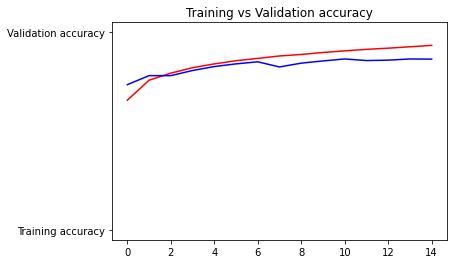

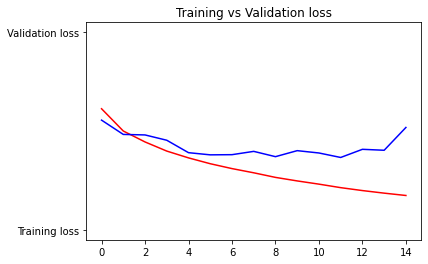

<Figure size 432x288 with 0 Axes>

In [12]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', "Training accuracy")
plt.plot(epochs, val_acc, 'b', "Validation accuracy")
plt.title("Training vs Validation accuracy")
plt.figure()

plt.plot(epochs, loss, 'r', "Training loss")
plt.plot(epochs, val_loss, 'b', "Validation loss")
plt.title("Training vs Validation loss")
plt.figure()